In [6]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

# Set visual styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


In [1]:
# Load the provided datasets
telemetry_1 = pd.read_csv('telemetry_1.csv')
telemetry_2 = pd.read_csv('telemetry_2.csv')
vehicle_data = pd.read_csv('vehicle_data.csv')

# Display the first few rows and general information of each dataset
telemetry_1_info = telemetry_1.info()
telemetry_1_head = telemetry_1.head()

telemetry_2_info = telemetry_2.info()
telemetry_2_head = telemetry_2.head()

vehicle_data_info = vehicle_data.info()
vehicle_data_head = vehicle_data.head()

telemetry_1_info, telemetry_1_head, telemetry_2_info, telemetry_2_head, vehicle_data_info, vehicle_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408670 entries, 0 to 408669
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   vehicle_id  408670 non-null  object 
 1   timestamp   408670 non-null  object 
 2   speed       271080 non-null  float64
 3   odometer    272566 non-null  float64
 4   fuel_level  96559 non-null   float64
dtypes: float64(3), object(2)
memory usage: 15.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425893 entries, 0 to 425892
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   vehicle_id  425893 non-null  object 
 1   timestamp   425893 non-null  object 
 2   val         425893 non-null  float64
 3   name        425893 non-null  object 
dtypes: float64(1), object(3)
memory usage: 13.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Nu

(None,
    vehicle_id                         timestamp  speed  odometer  fuel_level
 0   vehicle_4         2024-06-06 14:26:23-07:00   64.2       NaN         NaN
 1   vehicle_8  2024-07-05 22:24:12.856000-07:00    1.6   12048.0         NaN
 2   vehicle_3  2024-06-20 12:57:59.306000-07:00    NaN       NaN        45.0
 3  vehicle_10  2024-07-24 18:04:23.776000-07:00   36.2    1434.7         NaN
 4  vehicle_11         2024-07-06 11:08:03-07:00   29.5       NaN         NaN,
 None,
    vehicle_id                         timestamp   val   name
 0   vehicle_4         2024-07-23 19:56:44+05:30   0.0  speed
 1  vehicle_11         2024-04-04 22:33:56+05:30  52.7  speed
 2   vehicle_3  2024-07-18 23:30:04.027000+05:30   5.8  speed
 3   vehicle_3  2024-05-22 00:49:49.402000+05:30  34.4  speed
 4  vehicle_10  2024-07-16 05:48:11.710000+05:30  42.8  speed,
 None,
           id datasource  tank_capacity  rated_mpg
 0  vehicle_1   source_1           18.0         35
 1  vehicle_2   source_1           

In [31]:
telemetry_combined = pd.concat([telemetry_1, telemetry_2_pivot], ignore_index=True, sort=False)

# Inspect the combined dataframe
print(telemetry_combined.head())
combined_telemetry.to_csv('combined_telemetry.csv', index=False)

   vehicle_id                         timestamp  speed  odometer  fuel_level
0   vehicle_4         2024-06-06 14:26:23-07:00   64.2       NaN         NaN
1   vehicle_8  2024-07-05 22:24:12.856000-07:00    1.6   12048.0         NaN
2   vehicle_3  2024-06-20 12:57:59.306000-07:00    NaN       NaN        45.0
3  vehicle_10  2024-07-24 18:04:23.776000-07:00   36.2    1434.7         NaN
4  vehicle_11         2024-07-06 11:08:03-07:00   29.5       NaN         NaN


## Step 1: Convert Telemetry 1 into a long format similar to Telemetry 2

In [16]:

telemetry_1_melted = telemetry_1.melt(
    id_vars=['vehicle_id', 'timestamp'], 
    value_vars=['speed', 'odometer', 'fuel_level'], 
    var_name='name', value_name='val'
)




## Step 2: Pivoting both the telemetry table

In [28]:
# Pivot Telemetry 2 to match Telemetry 1's format
telemetry_2_pivot = telemetry_2.pivot_table(index=['vehicle_id', 'timestamp'], columns='name', values='val').reset_index()

# Append Telemetry 1 and the pivoted Telemetry 2
combined_telemetry = pd.concat([telemetry_1, telemetry_2_pivot], ignore_index=True)

# Merge with vehicle data
merged_data = pd.merge(combined_telemetry, vehicle_data, how='left', left_on='vehicle_id', right_on='id')



## Step 3: Combine corresponding telemetry messages in both tables to avoid redundancy

In [19]:

combined_telemetry = combined_telemetry.groupby(
    ['vehicle_id', 'timestamp', 'name'], as_index=False
).agg({'val': 'mean'})





In [20]:
# Step 4: Handle missing values if necessary
# For example, filling missing values or dropping rows with missing data
combined_telemetry['val'] = combined_telemetry['val'].fillna(method='ffill')

C:\Users\ashut\AppData\Local\Temp\ipykernel_17740\3898715160.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_telemetry['val'] = combined_telemetry['val'].fillna(method='ffill')


## Step 5: Explore the dataset to identify 3 key takeaways


In [21]:

# 1. Distribution of different telemetry types
telemetry_distribution = combined_telemetry['name'].value_counts()

# 2. Average speed, odometer, and fuel level
average_values = combined_telemetry.groupby('name')['val'].mean()

# 3. Vehicle with maximum entries in telemetry data
max_entries_vehicle = combined_telemetry['vehicle_id'].value_counts().idxmax()

# Output the results
print("Telemetry Distribution:\n", telemetry_distribution)
print("\nAverage Values:\n", average_values)
print("\nVehicle with Maximum Entries:", max_entries_vehicle)

Telemetry Distribution:
 name
odometer      589613
speed         588903
fuel_level    473230
Name: count, dtype: int64

Average Values:
 name
fuel_level    1129.749862
odometer      6532.459462
speed         1653.149418
Name: val, dtype: float64

Vehicle with Maximum Entries: vehicle_3


In [22]:
# Option 2: Aggregate duplicates by taking the mean of duplicate entries
telemetry_2 = telemetry_2.groupby(['vehicle_id', 'timestamp', 'name'], as_index=False).mean()

# Normalize Telemetry 2 to match Telemetry 1 format
telemetry_2_pivot = telemetry_2.pivot(index=['vehicle_id', 'timestamp'], columns='name', values='val').reset_index()

# Display the first few rows of the pivoted telemetry_2
print(telemetry_2_pivot.head())


name vehicle_id                  timestamp  fuel_level  odometer  speed
0     vehicle_1  2024-01-02 20:50:03+05:30         NaN     466.0    NaN
1     vehicle_1  2024-01-02 20:50:22+05:30         NaN       NaN    0.0
2     vehicle_1  2024-01-02 20:51:22+05:30         NaN       NaN    0.0
3     vehicle_1  2024-01-02 20:52:06+05:30       100.0     466.0    NaN
4     vehicle_1  2024-01-02 20:54:09+05:30         NaN     466.0    NaN


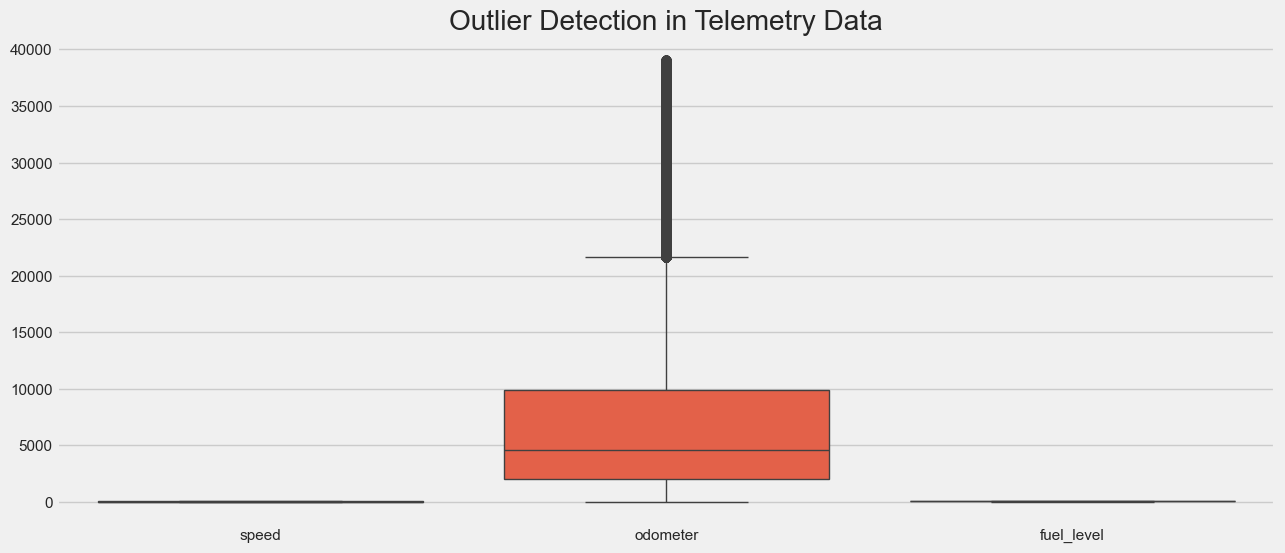

In [23]:
# Outlier Detection Visualization
plt.figure(figsize=(14, 6))
sns.boxplot(data=telemetry_combined[['speed', 'odometer', 'fuel_level']])
plt.title("Outlier Detection in Telemetry Data")
plt.show()

## Step 7: Visualization

C:\Users\ashut\AppData\Local\Temp\ipykernel_17740\4007353397.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=telemetry_distribution.index, y=telemetry_distribution.values, palette="Blues_d")


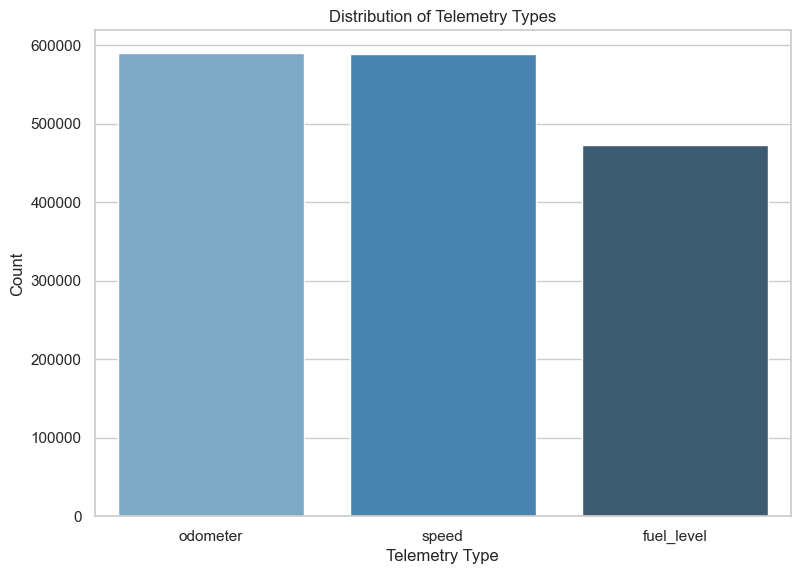

C:\Users\ashut\AppData\Local\Temp\ipykernel_17740\4007353397.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_values.index, y=average_values.values, palette="Greens_d")


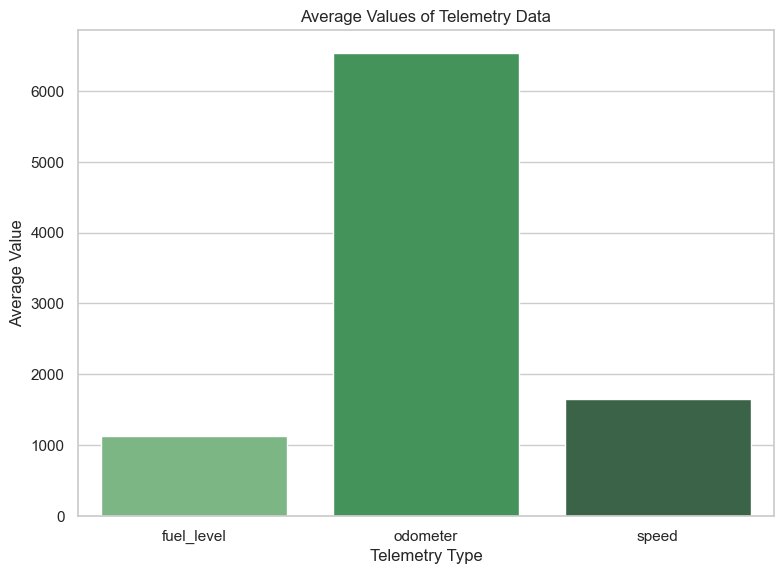

C:\Users\ashut\AppData\Local\Temp\ipykernel_17740\4007353397.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vehicle_telemetry_counts.index, x=vehicle_telemetry_counts.values, palette="Oranges_d")


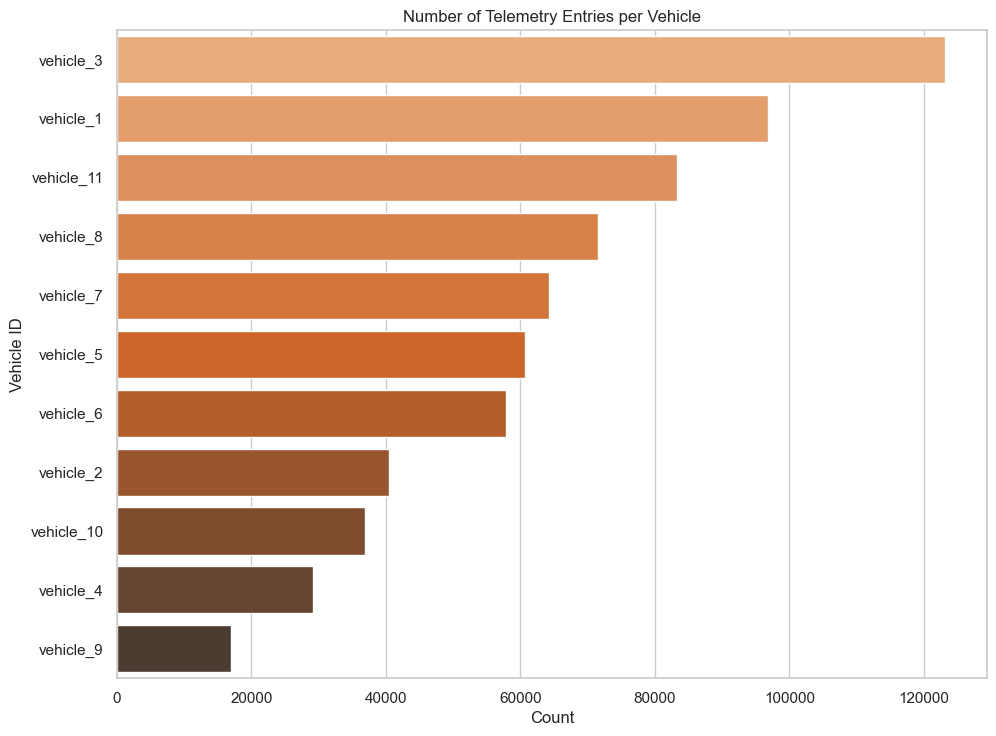

In [30]:

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Telemetry Types
plt.figure(figsize=(8, 6))
sns.barplot(x=telemetry_distribution.index, y=telemetry_distribution.values, palette="Blues_d")
plt.title('Distribution of Telemetry Types')
plt.xlabel('Telemetry Type')
plt.ylabel('Count')
plt.show()

# 2. Average Values of Telemetry Data
plt.figure(figsize=(8, 6))
sns.barplot(x=average_values.index, y=average_values.values, palette="Greens_d")
plt.title('Average Values of Telemetry Data')
plt.xlabel('Telemetry Type')
plt.ylabel('Average Value')
plt.show()

# 3. Vehicle Telemetry Counts
vehicle_telemetry_counts = combined_telemetry['vehicle_id'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(y=vehicle_telemetry_counts.index, x=vehicle_telemetry_counts.values, palette="Oranges_d")
plt.title('Number of Telemetry Entries per Vehicle')
plt.xlabel('Count')
plt.ylabel('Vehicle ID')
plt.show()

## Function to calculate fuel economy, considering refueling

In [29]:

def calculate_fuel_economy(df):
    df = df.sort_values('timestamp')
    df['fuel_level_change'] = df['fuel_level'].diff()
    df['odometer_change'] = df['odometer'].diff()

    fuel_economy = []
    last_fuel_used = None

    for i in range(1, len(df)):
        if df.iloc[i]['fuel_level_change'] > 0:  # Refueling detected
            last_fuel_used = None
            continue

        if pd.notna(df.iloc[i]['odometer_change']) and pd.notna(df.iloc[i]['fuel_level']):
            current_fuel_used = df.iloc[i]['tank_capacity'] * (df.iloc[i]['fuel_level'] / 100)

            if last_fuel_used is not None:
                fuel_used = last_fuel_used - current_fuel_used
                if fuel_used > 0:
                    mpg = df.iloc[i]['odometer_change'] / fuel_used
                    fuel_economy.append(mpg)

            last_fuel_used = current_fuel_used

    return sum(fuel_economy) / len(fuel_economy) if fuel_economy else None

# Apply function to each vehicle
fuel_economy_per_vehicle = merged_data.groupby('vehicle_id').apply(calculate_fuel_economy).reset_index()
fuel_economy_per_vehicle.columns = ['vehicle_id', 'average_fuel_economy']

# Display the calculated fuel economy
print(fuel_economy_per_vehicle.head())

   vehicle_id  average_fuel_economy
0   vehicle_1             -0.782869
1  vehicle_10                   NaN
2  vehicle_11              1.634732
3   vehicle_2             32.980846
4   vehicle_3            -15.671646


C:\Users\ashut\AppData\Local\Temp\ipykernel_17740\792102265.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fuel_economy_per_vehicle = merged_data.groupby('vehicle_id').apply(calculate_fuel_economy).reset_index()
